In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

URL = r"C:\Users\Owen Harris\Documents\DATA 301\Project\course-project-group_6012\data\raw\UniversitiesDataSet.csv"

df = pd.read_csv(URL)
df = df.iloc[200:,].reset_index(drop=True) #removing data from 2012 and 2013 - aka first 200 rows#
score_sum_2014 = df[df['year']==2014]['score'].sum()
score_sum_2015 = df[df['year']==2015]['score'].sum()
df["Score - Avg"] = df["score"] #create new column
for i in range(len(df)): #editing score - avg column
    if df.iloc[i,13] == "2014":
        df.iloc[i,14] = df.iloc[i,12] - (score_sum_2014/1000)
    else:
        df.iloc[i,14] = df.iloc[i,12] - (score_sum_2015/1000)
def highlight_cols(x): #highlighting important columns
    df = x.copy() # copy new df 
    df.loc[:, :] = 'background-color: white'  # change background to white
    df[['world_rank', 'alumni_employment']] = 'background-color: yellow' # change world rank and alumni employment column to yellow
    return df  # return new df
display(df.style.apply(highlight_cols, axis = None))

In [65]:
sns.set_theme(style="ticks", font_scale=1.2)

The following shows general statistics for all number based columns in the data.

In [66]:
df.describe(include=np.number).T

count        mean         std         min         25%  \
world_rank            2000.0   500.50000  288.747186     1.00000   250.75000   
national_rank         2000.0    42.51800   53.444193     1.00000     7.00000   
quality_of_education  2000.0   296.00150  106.868798     1.00000   250.75000   
alumni_employment     2000.0   385.26350  171.874782     1.00000   250.75000   
quality_of_faculty    2000.0   191.12750   52.402579     1.00000   210.00000   
publications          2000.0   500.41500  288.674823     1.00000   250.75000   
influence             2000.0   500.21900  288.305050     1.00000   250.75000   
citations             2000.0   449.34150  250.141228     1.00000   234.00000   
broad_impact          2000.0   496.69950  286.919755     1.00000   250.50000   
patents               2000.0   470.32100  259.625408     1.00000   242.75000   
score                 2000.0    47.06763    6.590461    44.02000    44.44000   
year                  2000.0  2014.50000    0.500125  2014.00000  2014.00000   
Score - Avg           2000.0     0.20378    6.590461    -2.84385    -2.42385   

                             50%         75%         max  
world_rank             500.50000   750.25000  1000.00000  
national_rank           22.00000    52.00000   229.00000  
quality_of_education   355.00000   367.00000   367.00000  
alumni_employment      478.00000   500.25000   567.00000  
quality_of_faculty     210.00000   218.00000   218.00000  
publications           500.50000   750.00000  1000.00000  
influence              500.50000   750.25000   991.00000  
citations              428.00000   645.00000   812.00000  
broad_impact           496.00000   741.00000  1000.00000  
patents                481.00000   737.00000   871.00000  
score                   44.96000    46.81250   100.00000  
year                  2014.50000  2015.00000  2015.00000  
Score - Avg             -1.90385    -0.05135    53.13615

The following shows descriptive statistics for non-number based variables in the data.

In [67]:
df.describe(include=np.object).T

count unique                 top freq
institution  2000   1023  University of Vigo    2
country      2000     59                 USA  458

The following figure shows the number of appearances per country in the top 1000 ranking for 2014 and 2015.  Observations are as followed:

1. The USA appears on the top 1000 list many more times than any other country, and makes up nearly 25% of the list
2. Many countries only have a few universities that make the top 1000 list each year
3. Other countries that have a large number of appearances include Japan, the United Kingdom, and China

Text(0, 0.5, 'Country')

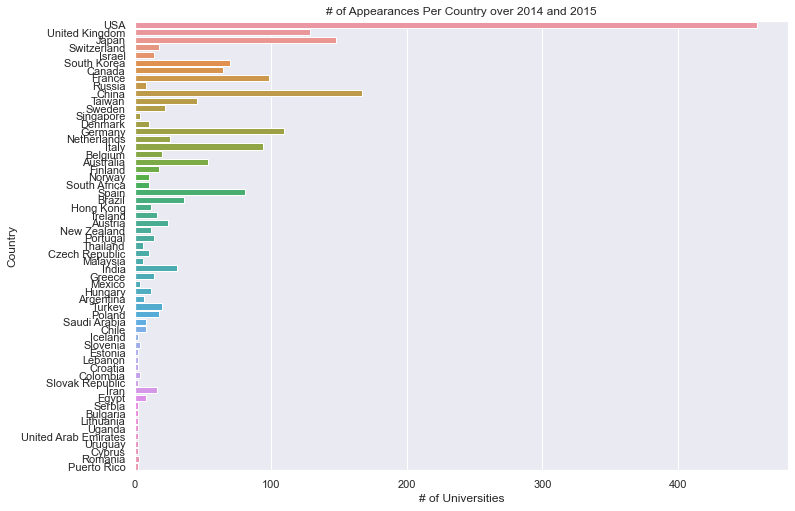

In [68]:
sns.set_theme(style="ticks", font_scale=0.2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
by_country = sns.countplot(y='country', data=df).set_title("# of Appearances Per Country over 2014 and 2015")
plt.xlabel("# of Universities")
plt.ylabel("Country")

The following figures show a regression analysis analyzing different variables against alumni employment, which is likely the focus of our investigation. The general trends are as follows:

1. Weak but present correlations exist between all variables when plotted against alumni employment
2. A better ranking in any variable generally leads to a better (lower) alumni employment ranking
3. The correlation appears to be stronger at lower alumni employment rankings (i.e. <100), whereas the correlation becomes less significant at higher rankings
4. No one variable is better at predicting alumni employment, therefore, world ranking should be used as it is likely the easiest to monitor
5. National ranking provides the weakest correlation and therefore shouldn't be used, likely due to variation within every country

Text(0.5, 1.0, 'Correlation of World Rank with Alumni Employment')

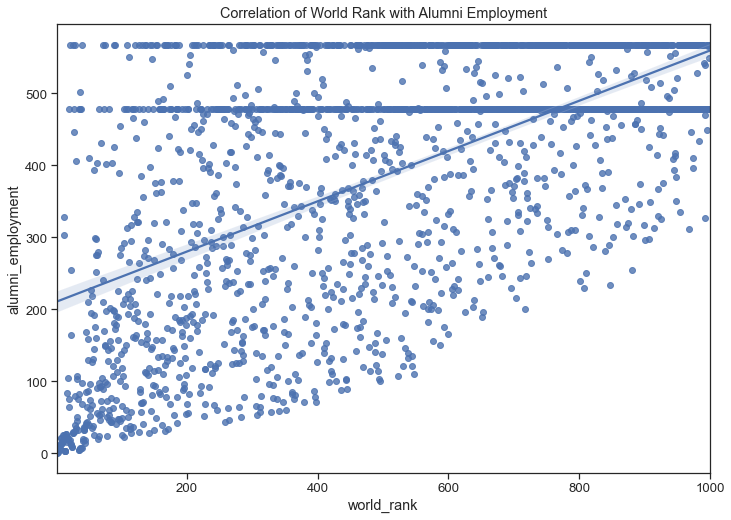

In [69]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="world_rank", y="alumni_employment").set_title("Correlation of World Rank with Alumni Employment")

Text(0.5, 1.0, 'Correlation of National Rank with Alumni Employment')

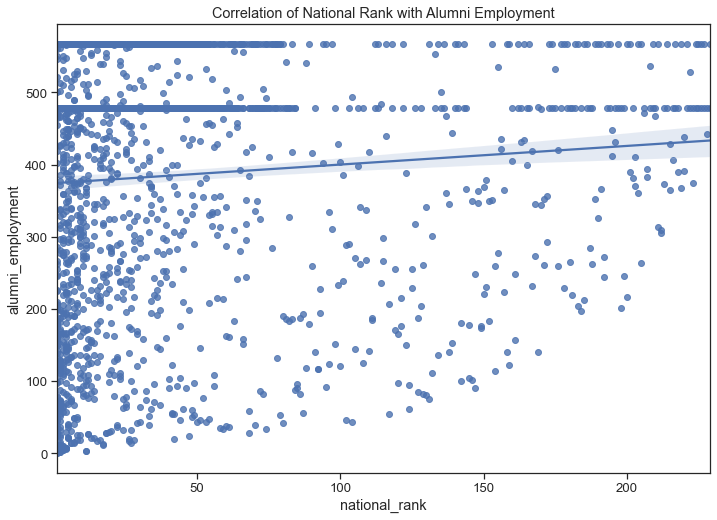

In [70]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="national_rank", y="alumni_employment").set_title("Correlation of National Rank with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Score with Alumni Employment')

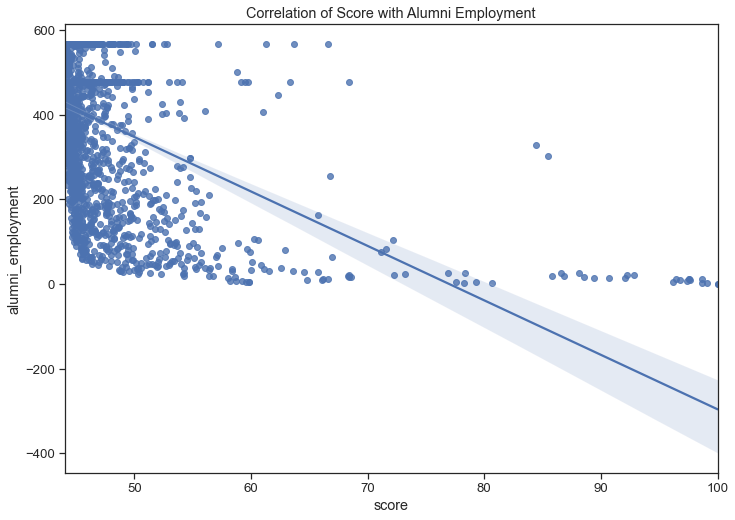

In [71]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="score", y="alumni_employment").set_title("Correlation of Score with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Publications with Alumni Employment')

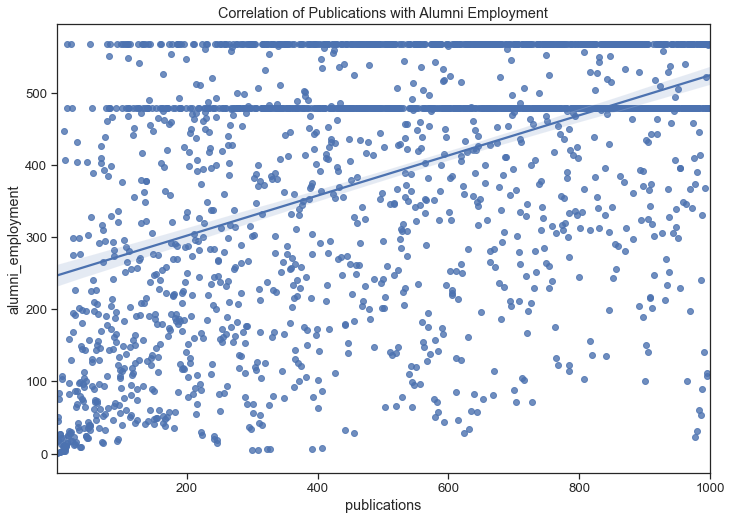

In [72]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="publications", y="alumni_employment").set_title("Correlation of Publications with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Influence with Alumni Employment')

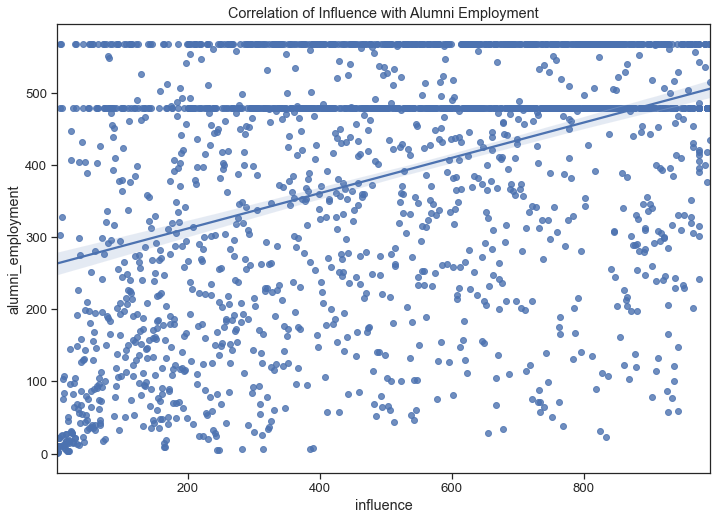

In [73]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="influence", y="alumni_employment").set_title("Correlation of Influence with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Quality of Education with Alumni Employment')

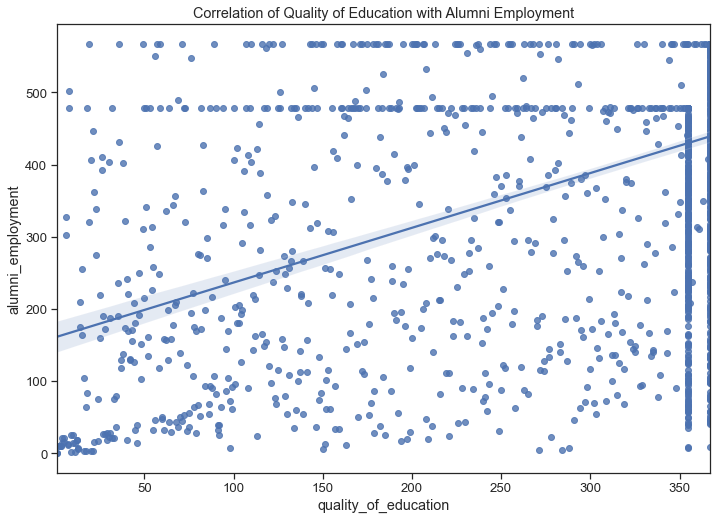

In [74]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="quality_of_education", y="alumni_employment").set_title("Correlation of Quality of Education with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Quality of Faculty with Alumni Employment')

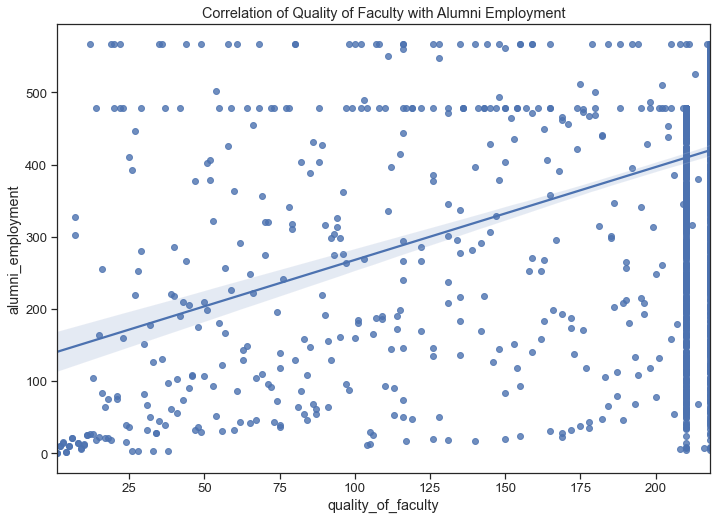

In [75]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="quality_of_faculty", y="alumni_employment").set_title("Correlation of Quality of Faculty with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Citations with Alumni Employment')

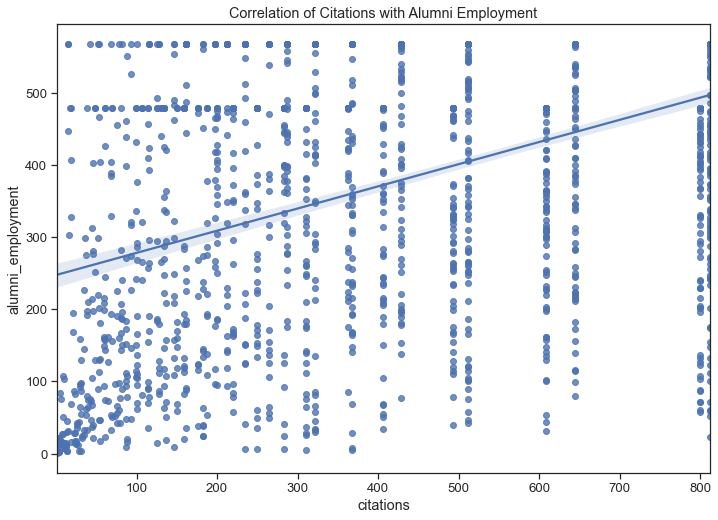

In [76]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="citations", y="alumni_employment").set_title("Correlation of Citations with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Broad Impact with Alumni Employment')

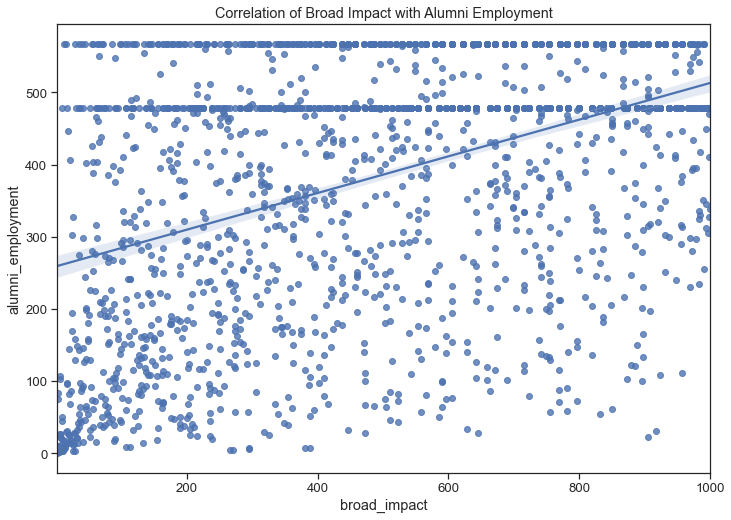

In [77]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="broad_impact", y="alumni_employment").set_title("Correlation of Broad Impact with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Patents with Alumni Employment')

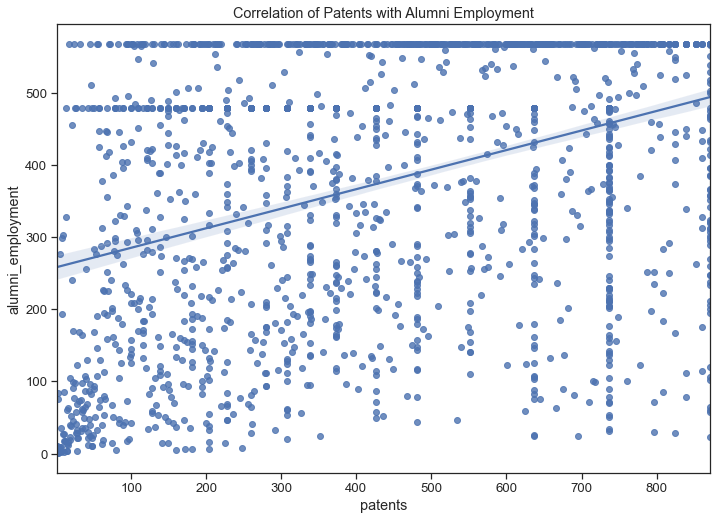

In [78]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="patents", y="alumni_employment").set_title("Correlation of Patents with Alumni Employment")

Text(0.5, 1.0, 'Correlation of Score - Average with Alumni Employment')

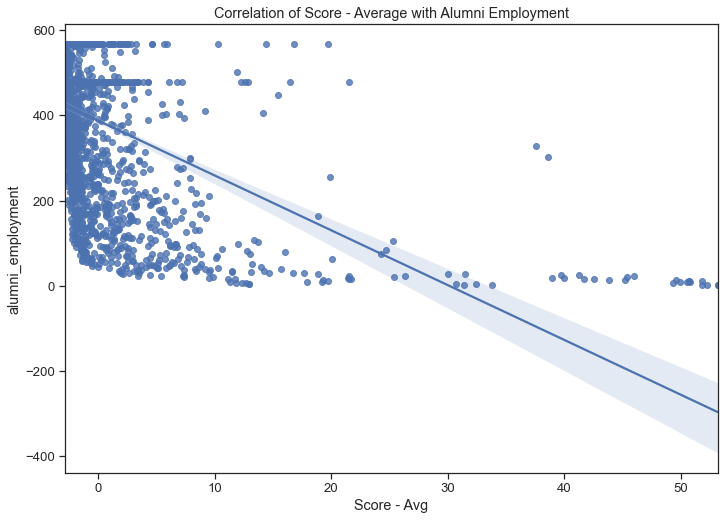

In [79]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="Score - Avg", y="alumni_employment").set_title("Correlation of Score - Average with Alumni Employment")

The following analyzes alumni employment per country in a violin plot. Observations are as follows:
1. The variation in alumni employment is very high in some countries (i.e. USA), and very small in other countries (i.e. Puerto Rico)
2. This variation is likely related to the number of universities each country has on the top 1000 list.

Text(0.5, 0, 'Alumni Employment')

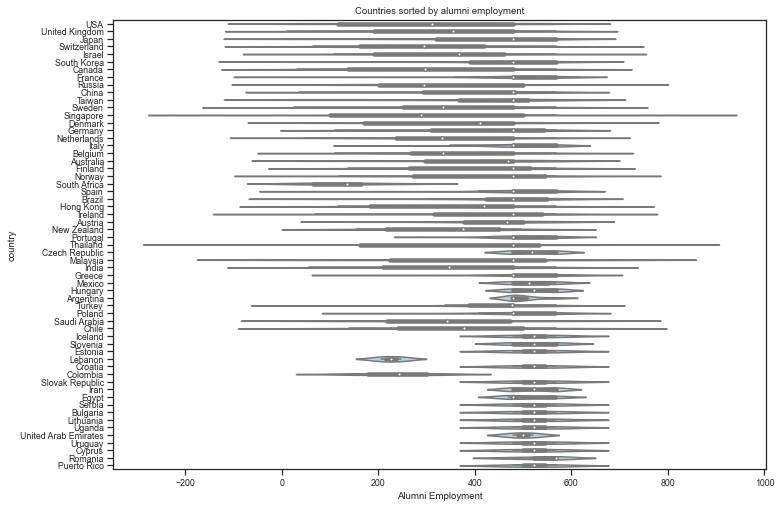

In [81]:
sns.set_theme(style="ticks", font_scale=0.8)
g= sns.violinplot(data=df, x="alumni_employment", y="country", color='lightblue').set_title("Countries sorted by alumni employment")
plt.xlabel("Alumni Employment")